File loaded successfully!
Number of nodes in the network: 574
Number of edges in the network: 9479

Top 10 critical stations based on betweenness centrality:
                      Station  Betweenness Centrality
0   Wabash Ave & Roosevelt Rd                0.050196
1         Ellis Ave & 53rd St                0.045845
2      Green St & Randolph St                0.043047
3       Kimbark Ave & 53rd St                0.037681
4  Indiana Ave & Roosevelt Rd                0.027533
5        Paulina St & 18th St                0.024440
6         Troy St & North Ave                0.022405
7     Lake Park Ave & 56th St                0.022212
8  Franklin St & Jackson Blvd                0.022199
9       Green St & Madison St                0.020052

Robustness Analysis Results:
    nodes_removed  giant_component_size  clustering_coefficient  \
0               0              0.987805                0.209887   
1               1              0.986063                0.207445   
2               2

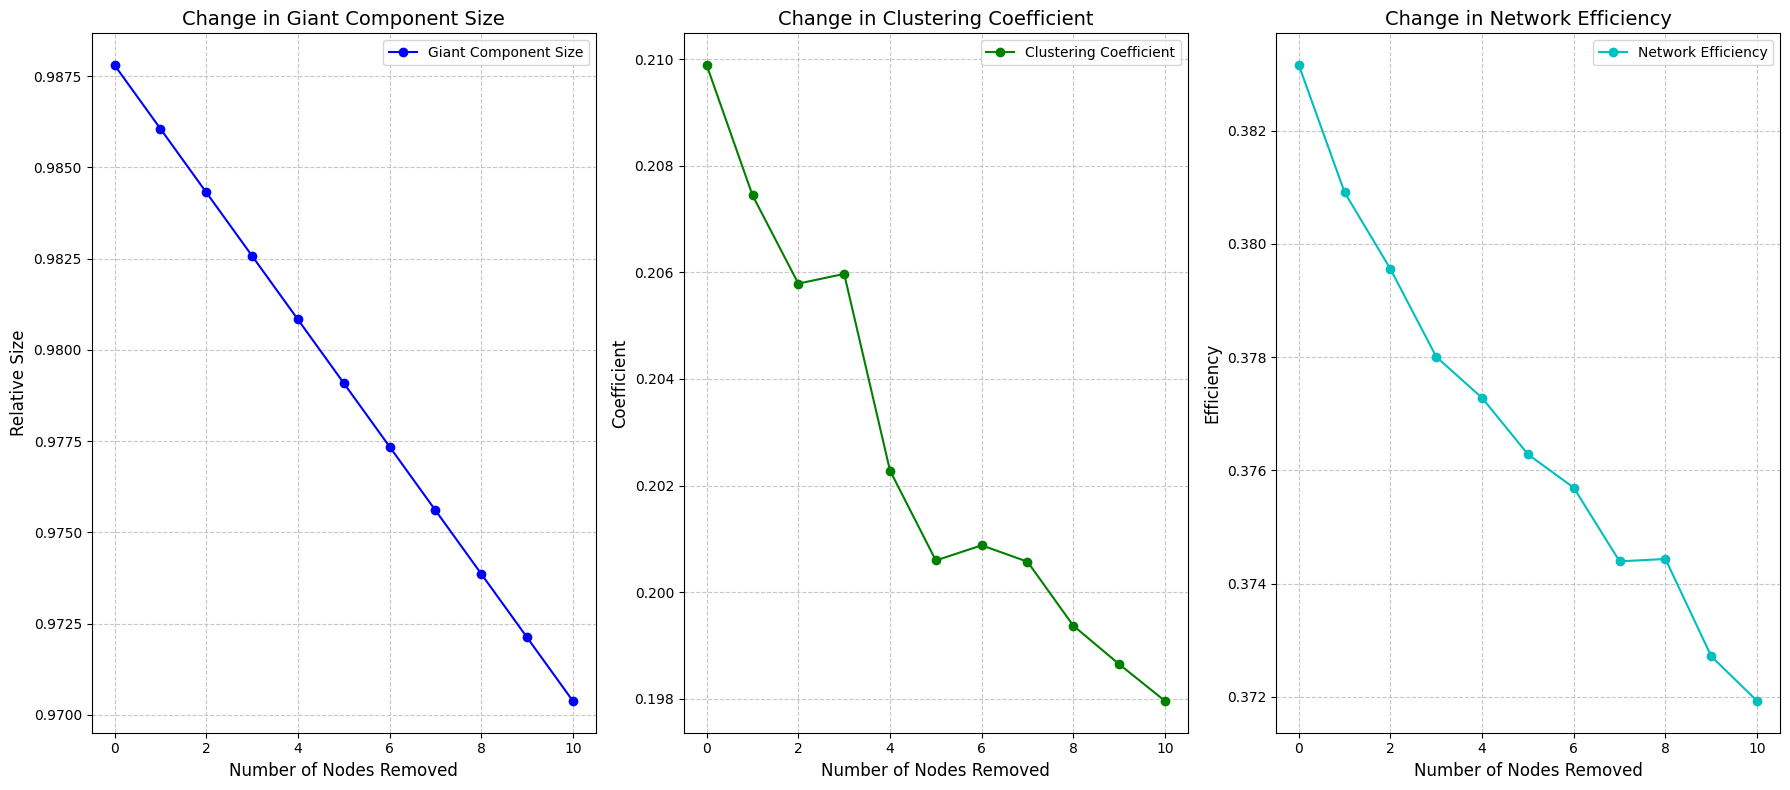

In [17]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the file path to the GML file on MacBook Desktop
file_path = '/Users/xuzhixuan/Desktop/NS/final/1week_bike_network.gml'  # Update with your actual username

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please check the file path.")
else:
    # Load the GML file into a NetworkX graph
    G = nx.read_gml(file_path)
    print("File loaded successfully!")
    print("Number of nodes in the network:", G.number_of_nodes())
    print("Number of edges in the network:", G.number_of_edges())

# Define the robustness analysis function
def analyze_network_robustness(graph, critical_nodes):
    
    # Initialize results storage
    results = {
        'nodes_removed': [],
        'giant_component_size': [],
        'clustering_coefficient': [],
        'network_efficiency': []
    }
    
    # Copy the input graph to preserve the original
    G = graph.copy()
    n_nodes = G.number_of_nodes()
    
    def calculate_network_metrics(G):
        
        # Calculate the size of the largest connected component
        largest_cc = max(nx.weakly_connected_components(G), key=len)
        gcc_size = len(largest_cc) / n_nodes
        
        clustering = nx.average_clustering(G.to_undirected())
        efficiency = nx.global_efficiency(G.to_undirected())
        
        return gcc_size, clustering, efficiency
    
    # Calculate initial network metrics
    gcc_size, clustering, efficiency = calculate_network_metrics(G)
    results['nodes_removed'].append(0)
    results['giant_component_size'].append(gcc_size)
    results['clustering_coefficient'].append(clustering)
    results['network_efficiency'].append(efficiency)
    
    # Remove critical nodes iteratively and calculate metrics
    for i, node in enumerate(critical_nodes, 1):
        if node in G:
            G.remove_node(node)
            gcc_size, clustering, efficiency = calculate_network_metrics(G)
            results['nodes_removed'].append(i)
            results['giant_component_size'].append(gcc_size)
            results['clustering_coefficient'].append(clustering)
            results['network_efficiency'].append(efficiency)
    
    return pd.DataFrame(results)

# Identify critical nodes using betweenness centrality
def get_critical_nodes(graph, method='betweenness', top_n=10):
    
    if method == 'degree':
        centrality = nx.degree_centrality(graph)
    elif method == 'betweenness':
        centrality = nx.betweenness_centrality(graph)
    elif method == 'eigenvector':
        centrality = nx.eigenvector_centrality(graph)
    else:
        raise ValueError("Unsupported centrality method.")
    
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Select top 10 critical nodes using betweenness centrality
top_10_stations = get_critical_nodes(G, method='betweenness', top_n=10)
critical_nodes = [node for node, _ in top_10_stations]

# Display the critical nodes
top_10_df = pd.DataFrame(top_10_stations, columns=['Station', 'Betweenness Centrality'])
print("\nTop 10 critical stations based on betweenness centrality:")
print(top_10_df)

# Perform robustness analysis
results = analyze_network_robustness(G, critical_nodes)

# Display the analysis results directly
print("\nRobustness Analysis Results:")
print(results)

# Enhanced visualization of the robustness analysis
plt.figure(figsize=(18, 8))

# Plot giant component size
plt.subplot(131)
plt.plot(results['nodes_removed'], results['giant_component_size'], 'b-o', label='Giant Component Size')
plt.title('Change in Giant Component Size', fontsize=14)
plt.xlabel('Number of Nodes Removed', fontsize=12)
plt.ylabel('Relative Size', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot clustering coefficient
plt.subplot(132)
plt.plot(results['nodes_removed'], results['clustering_coefficient'], 'g-o', label='Clustering Coefficient')
plt.title('Change in Clustering Coefficient', fontsize=14)
plt.xlabel('Number of Nodes Removed', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot network efficiency
plt.subplot(133)
plt.plot(results['nodes_removed'], results['network_efficiency'], 'c-o', label='Network Efficiency')
plt.title('Change in Network Efficiency', fontsize=14)
plt.xlabel('Number of Nodes Removed', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


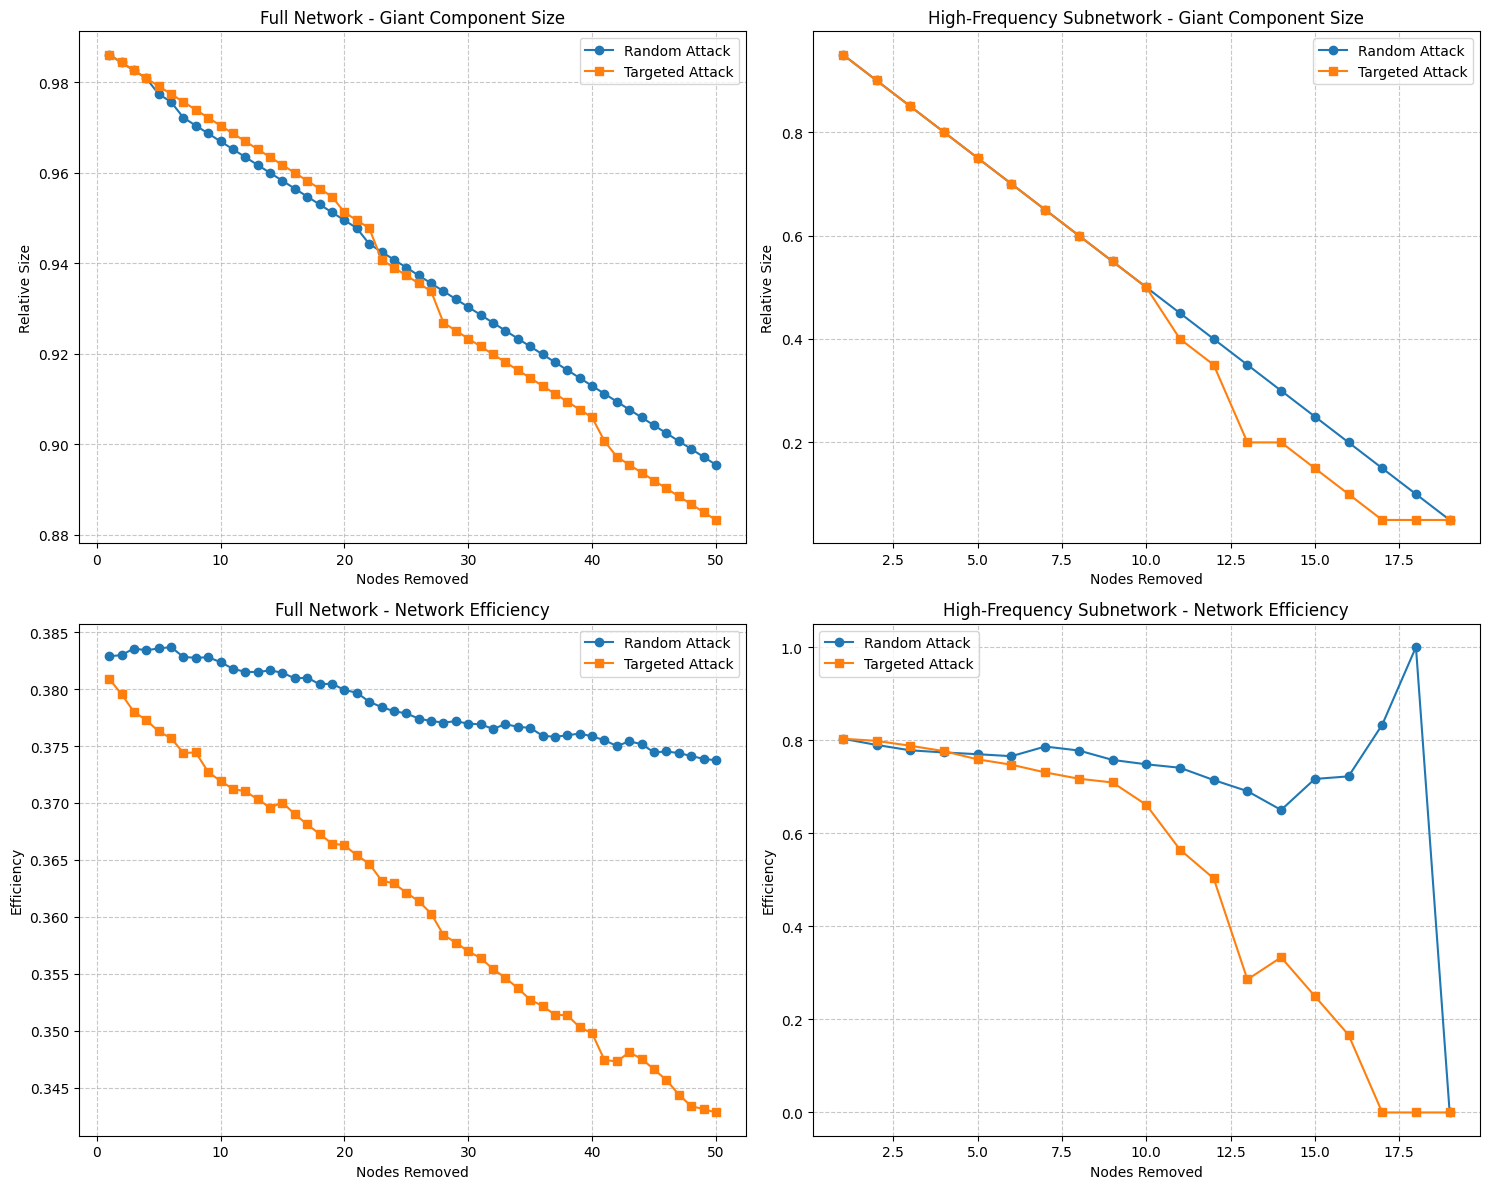


=== Full Network Attack Analysis ===

Random Attack (Full Network):
    nodes_removed  giant_component_size  clustering  network_efficiency
0               1              0.986063    0.148874            0.382877
1               2              0.984321    0.148091            0.382985
2               3              0.982578    0.148506            0.383561
3               4              0.980836    0.148401            0.383408
4               5              0.977352    0.148706            0.383566
5               6              0.975610    0.148491            0.383686
6               7              0.972125    0.148734            0.382818
7               8              0.970383    0.148474            0.382747
8               9              0.968641    0.148714            0.382795
9              10              0.966899    0.148312            0.382367
10             11              0.965157    0.147881            0.381780
11             12              0.963415    0.147834            0.38

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the GML file
G = nx.read_gml('/Users/xuzhixuan/Desktop/NS/final/1week_bike_network.gml')

def identify_high_frequency_stations(G):
    """Identify high-frequency stations based on their degree."""
    degree_freq = dict(G.degree())
    freq_stations = pd.DataFrame(list(degree_freq.items()), 
                               columns=['Station', 'Frequency'])\
                     .sort_values('Frequency', ascending=False)\
                     .head(20)
    return freq_stations

def analyze_network_metrics(G):
    """Analyze basic network metrics."""
    metrics = {}
    try:
        metrics.update({
            'avg_shortest_path': nx.average_shortest_path_length(G),  # Average shortest path length
            'clustering': nx.average_clustering(G),  # Average clustering coefficient
            'density': nx.density(G),  # Network density
            'avg_degree': sum(dict(G.degree()).values()) / G.number_of_nodes(),  # Average degree
            'network_efficiency': nx.global_efficiency(G.to_undirected())  # Global efficiency
        })
    except nx.NetworkXError:
        metrics.update({
            'avg_shortest_path': float('inf'),  # Infinite if disconnected
            'clustering': 0,
            'density': 0,
            'avg_degree': 0,
            'network_efficiency': 0
        })
    
    # Calculate the size of the largest connected component
    g_undirected = G.to_undirected()
    largest_cc = max(nx.connected_components(g_undirected), key=len)
    metrics['largest_cc_size'] = len(largest_cc) / G.number_of_nodes()
    
    return metrics

def simulate_attack_trend(G, max_removals, attack_type='random'):
    """Simulate network robustness trends under random and targeted attacks."""
    results = {'nodes_removed': [], 'giant_component_size': [], 'clustering': [], 'network_efficiency': []}
    G_copy = G.copy()
    
    # Determine the removal order
    num_removals = min(max_removals, G_copy.number_of_nodes())  # Ensure we don't exceed the node count
    if attack_type == 'random':
        removal_order = np.random.choice(list(G_copy.nodes()), size=num_removals, replace=False)
    elif attack_type == 'targeted':
        centrality = nx.betweenness_centrality(G_copy)  # Use betweenness centrality for targeted attacks
        removal_order = [n for n, _ in sorted(centrality.items(), key=lambda x: x[1], reverse=True)][:num_removals]
    else:
        raise ValueError("Invalid attack type. Use 'random' or 'targeted'.")

    # Iteratively remove nodes and calculate metrics
    for i, node in enumerate(removal_order, start=1):
        G_copy.remove_node(node)
        
        # Stop if the graph becomes empty
        if G_copy.number_of_nodes() == 0:
            break
        
        # Ensure there are still connected components to evaluate
        if len(G_copy.nodes()) > 0:
            largest_cc = max(nx.connected_components(G_copy.to_undirected()), key=len)
            gcc_size = len(largest_cc) / G.number_of_nodes()
            clustering = nx.average_clustering(G_copy)
            efficiency = nx.global_efficiency(G_copy.to_undirected())
        else:
            gcc_size = 0
            clustering = 0
            efficiency = 0
        
        results['nodes_removed'].append(i)
        results['giant_component_size'].append(gcc_size)
        results['clustering'].append(clustering)
        results['network_efficiency'].append(efficiency)
    
    return pd.DataFrame(results)

# High-frequency subnetwork analysis
freq_stations = identify_high_frequency_stations(G)
freq_subnetwork = G.subgraph(freq_stations['Station'].tolist())

# Set the maximum number of nodes to remove
max_removals = 50

# Random and targeted attacks for the full network
random_trend_full = simulate_attack_trend(G, max_removals=max_removals, attack_type='random')
targeted_trend_full = simulate_attack_trend(G, max_removals=max_removals, attack_type='targeted')

# Random and targeted attacks for the high-frequency subnetwork
random_trend_freq = simulate_attack_trend(freq_subnetwork, max_removals=max_removals, attack_type='random')
targeted_trend_freq = simulate_attack_trend(freq_subnetwork, max_removals=max_removals, attack_type='targeted')

# Visualization: Full network and high-frequency subnetwork
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Full network giant component size
axes[0, 0].plot(random_trend_full['nodes_removed'], random_trend_full['giant_component_size'], label='Random Attack', marker='o')
axes[0, 0].plot(targeted_trend_full['nodes_removed'], targeted_trend_full['giant_component_size'], label='Targeted Attack', marker='s')
axes[0, 0].set_title('Full Network - Giant Component Size')
axes[0, 0].set_xlabel('Nodes Removed')
axes[0, 0].set_ylabel('Relative Size')
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# High-frequency subnetwork giant component size
axes[0, 1].plot(random_trend_freq['nodes_removed'], random_trend_freq['giant_component_size'], label='Random Attack', marker='o')
axes[0, 1].plot(targeted_trend_freq['nodes_removed'], targeted_trend_freq['giant_component_size'], label='Targeted Attack', marker='s')
axes[0, 1].set_title('High-Frequency Subnetwork - Giant Component Size')
axes[0, 1].set_xlabel('Nodes Removed')
axes[0, 1].set_ylabel('Relative Size')
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Full network network efficiency
axes[1, 0].plot(random_trend_full['nodes_removed'], random_trend_full['network_efficiency'], label='Random Attack', marker='o')
axes[1, 0].plot(targeted_trend_full['nodes_removed'], targeted_trend_full['network_efficiency'], label='Targeted Attack', marker='s')
axes[1, 0].set_title('Full Network - Network Efficiency')
axes[1, 0].set_xlabel('Nodes Removed')
axes[1, 0].set_ylabel('Efficiency')
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# High-frequency subnetwork network efficiency
axes[1, 1].plot(random_trend_freq['nodes_removed'], random_trend_freq['network_efficiency'], label='Random Attack', marker='o')
axes[1, 1].plot(targeted_trend_freq['nodes_removed'], targeted_trend_freq['network_efficiency'], label='Targeted Attack', marker='s')
axes[1, 1].set_title('High-Frequency Subnetwork - Network Efficiency')
axes[1, 1].set_xlabel('Nodes Removed')
axes[1, 1].set_ylabel('Efficiency')
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Output results
print("\n=== Full Network Attack Analysis ===")
print("\nRandom Attack (Full Network):")
print(random_trend_full)
print("\nTargeted Attack (Full Network):")
print(targeted_trend_full)

print("\n=== High-Frequency Subnetwork Attack Analysis ===")
print("\nRandom Attack (High-Frequency Subnetwork):")
print(random_trend_freq)
print("\nTargeted Attack (High-Frequency Subnetwork):")
print(targeted_trend_freq)
